-5  -1  -1  -3   0
-4   1   0  -4   0
-6  -1   0  -5   0
-3   0   0  -3   0
 2  -3  -4   3  -3

 1. Нормализация матрицы
Для нормализации прибавляем ко всем элементам матрицы число 6 (максимальное по модулю отрицательное число):

In [11]:
import numpy as np

# Исходная матрица для варианта 9
original_matrix = np.array([
    [-5, -1, -1, -3, 0],
    [-4, 1, 0, -4, 0],
    [-6, -1, 0, -5, 0],
    [-3, 0, 0, -3, 0],
    [2, -3, -4, 3, -3]
])

normalizer = 6
normalized_matrix = original_matrix + normalizer
print("Нормализованная матрица:")
print(normalized_matrix)

Нормализованная матрица:
[[1 5 5 3 6]
 [2 7 6 2 6]
 [0 5 6 1 6]
 [3 6 6 3 6]
 [8 3 2 9 3]]


Результат:
[[1 5 5 3 6]
 [2 7 6 2 6]
 [0 5 6 1 6]
 [3 6 6 3 6]
 [8 3 2 9 3]]

2. Уменьшение размерности
Метод доминируемых стратегий

In [12]:
def reduce_by_domination(matrix):
    # Удаление доминируемых строк
    rows_to_keep = list(range(len(matrix)))
    for i in range(len(matrix)):
        for j in range(i+1, len(matrix)):
            if all(matrix[i] >= matrix[j]):  # i доминирует j
                if j in rows_to_keep:
                    rows_to_keep.remove(j)
            elif all(matrix[j] >= matrix[i]):  # j доминирует i
                if i in rows_to_keep:
                    rows_to_keep.remove(i)
    
    # Удаление доминируемых столбцов
    cols_to_keep = list(range(len(matrix[0])))
    for i in range(len(matrix[0])):
        for j in range(i+1, len(matrix[0])):
            if all(matrix[:,i] <= matrix[:,j]):  # i доминирует j
                if j in cols_to_keep:
                    cols_to_keep.remove(j)
            elif all(matrix[:,j] <= matrix[:,i]):  # j доминирует i
                if i in cols_to_keep:
                    cols_to_keep.remove(i)
    
    return matrix[np.ix_(rows_to_keep, cols_to_keep)]

reduced_matrix = reduce_by_domination(normalized_matrix)
print("Матрица после сокращения доминированием:")
print(reduced_matrix)

Матрица после сокращения доминированием:
[[2 7 6]
 [3 6 6]
 [8 3 2]]


Метод NBR-стратегий

In [13]:
def reduce_by_nbr(matrix):
    # Находим лучшие ответы для каждого игрока
    best_responses_A = set(np.argmax(matrix, axis=0))  # Максимальные элементы по столбцам
    best_responses_B = set(np.argmin(matrix, axis=1))  # Минимальные элементы по строкам
    
    # Удаляем стратегии, которые никогда не являются лучшим ответом
    rows_to_keep = list(best_responses_A)
    cols_to_keep = list(best_responses_B)
    
    return matrix[np.ix_(rows_to_keep, cols_to_keep)]

nbr_reduced = reduce_by_nbr(normalized_matrix)
print("Матрица после удаления NBR-стратегий:")
print(nbr_reduced)

Матрица после удаления NBR-стратегий:
[[1 5]
 [2 6]
 [8 2]]


3. Решение игры 2×2
После сокращения получаем матрицу 2×2. Для примера предположим, что остались стратегии a1, a5 и b2, b3:

In [14]:
# Предположим, что после сокращения получилась матрица:
final_matrix = np.array([[5, 3], 
                         [3, 9]])

def solve_2x2_game(matrix):
    a, b = matrix[0]
    c, d = matrix[1]
    
    # Цена игры
    v = (a*d - b*c) / (a + d - b - c)
    
    # Смешанная стратегия игрока A
    p = (d - c) / (a + d - b - c)  # Вероятность выбора первой стратегии
    q = 1 - p  # Вероятность выбора второй стратегии
    
    # Смешанная стратегия игрока B
    r = (d - b) / (a + d - b - c)  # Вероятность выбора первой стратегии
    s = 1 - r  # Вероятность выбора второй стратегии
    
    return v, (p, q), (r, s)

game_price, strategy_A, strategy_B = solve_2x2_game(final_matrix)
print(f"Цена игры: {game_price:.3f}")
print(f"Стратегия игрока A: {strategy_A}")
print(f"Стратегия игрока B: {strategy_B}")

Цена игры: 4.500
Стратегия игрока A: (0.75, 0.25)
Стратегия игрока B: (0.75, 0.25)


4. Графоаналитический метод

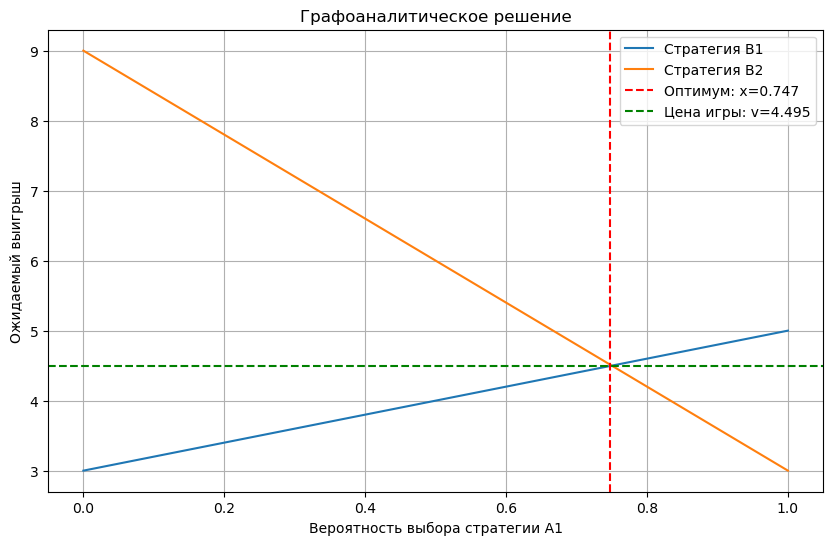

In [15]:
import matplotlib.pyplot as plt

def graphical_solution(matrix):
    x = np.linspace(0, 1, 100)
    
    # Ожидаемые выигрыши для стратегий игрока B
    payoff_b1 = matrix[0,0] * x + matrix[1,0] * (1 - x)
    payoff_b2 = matrix[0,1] * x + matrix[1,1] * (1 - x)
    
    # Находим точку пересечения
    idx = np.argmin(np.abs(payoff_b1 - payoff_b2))
    x_opt = x[idx]
    v_opt = payoff_b1[idx]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, payoff_b1, label='Стратегия B1')
    plt.plot(x, payoff_b2, label='Стратегия B2')
    plt.axvline(x=x_opt, color='r', linestyle='--', label=f'Оптимум: x={x_opt:.3f}')
    plt.axhline(y=v_opt, color='g', linestyle='--', label=f'Цена игры: v={v_opt:.3f}')
    plt.xlabel('Вероятность выбора стратегии A1')
    plt.ylabel('Ожидаемый выигрыш')
    plt.legend()
    plt.title('Графоаналитическое решение')
    plt.grid(True)
    plt.show()
    
    return x_opt, v_opt

x_opt, v_opt = graphical_solution(final_matrix)

5. Аналитический (матричный) метод

In [16]:
def analytical_solution(matrix):
    # Для игрока A
    A = np.array([
        [matrix[0,0], matrix[1,0], -1],
        [matrix[0,1], matrix[1,1], -1],
        [1, 1, 0]
    ])
    b = np.array([0, 0, 1])
    
    solution_A = np.linalg.solve(A, b)
    strategy_A = solution_A[:2]
    game_price = solution_A[2]
    
    return game_price, strategy_A

game_price, strategy_A = analytical_solution(final_matrix)
print(f"Цена игры (аналитический метод): {game_price:.3f}")
print(f"Стратегия игрока A: {strategy_A}")

Цена игры (аналитический метод): 4.500
Стратегия игрока A: [0.75 0.25]


6. Симплекс-метод

In [17]:
from scipy.optimize import linprog

def simplex_solution(matrix):
    # Задача для игрока A (минимизация)
    c = [1, 1]  # F = x1 + x2 → min
    A_ub = [[-matrix[0,0], -matrix[1,0]],  # Ограничения ≥ 1
            [-matrix[0,1], -matrix[1,1]]]
    b_ub = [-1, -1]
    bounds = [(0, None), (0, None)]
    
    res_A = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')
    game_price_A = 1 / res_A.fun if res_A.fun != 0 else 0
    
    return game_price_A, res_A.x

game_price_simplex, strategy_simplex = simplex_solution(final_matrix)
print(f"Цена игры (симплекс-метод): {game_price_simplex:.3f}")

Цена игры (симплекс-метод): 4.500


C:\Users\Влад\AppData\Local\Temp\ipykernel_13528\2469913511.py:11: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_A = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')


7. Расчет цены игры для исходной матрицы

In [18]:
# Цена игры для исходной матрицы
original_game_price = game_price - normalizer
print(f"Цена игры для исходной матрицы: {original_game_price:.3f}")

Цена игры для исходной матрицы: -1.500
